In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("monthly data.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,113.2
1,2013-02-01,113.9
2,2013-03-01,113.5
3,2013-04-01,114.7
4,2013-05-01,117.8
...,...,...
108,2022-01-01,172.0
109,2022-02-01,170.4
110,2022-03-01,169.6
111,2022-04-01,175.1


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,113.2
1,2013-02-01,113.9
2,2013-03-01,113.5
3,2013-04-01,114.7
4,2013-05-01,117.8
...,...,...
108,2022-01-01,172.0
109,2022-02-01,170.4
110,2022-03-01,169.6
111,2022-04-01,175.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,113.2
2013-02-01,113.9
2013-03-01,113.5
2013-04-01,114.7
2013-05-01,117.8
...,...
2022-01-01,172.0
2022-02-01,170.4
2022-03-01,169.6


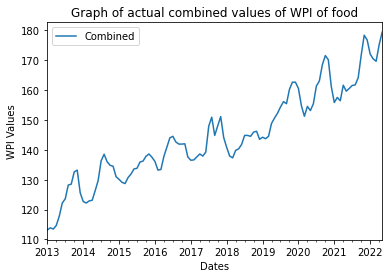

In [10]:
data.plot()
plt.title('Graph of actual combined values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

## Checking whether the data is stationary or not

In [11]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest

(1.123480477030908,
 0.9954121199565441,
 10,
 102,
 {'1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263},
 481.68663765549434)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [12]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.9954121199565441


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [13]:
data["Combined first difference"]=data-data.shift(1)
data

,Combined,Combined first difference
Date,,
2013-01-01,113.2,NaN
2013-02-01,113.9,0.7
2013-03-01,113.5,-0.4
2013-04-01,114.7,1.2
2013-05-01,117.8,3.1
...,...,...
2022-01-01,172.0,-4.7
2022-02-01,170.4,-1.6
2022-03-01,169.6,-0.8


In [14]:
adftest = adfuller(data["Combined first difference"].dropna())
adftest

(-6.5222471516451535,
 1.0352169587504155e-08,
 9,
 102,
 {'1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263},
 476.9773761495196)

Now data is stationary

In [15]:
data["Combined 12 difference"] = data['Combined']-data['Combined'].shift(12)
data["Combined 12 difference"]

Date
2013-01-01     NaN
2013-02-01     NaN
2013-03-01     NaN
2013-04-01     NaN
2013-05-01     NaN
              ... 
2022-01-01    16.2
2022-02-01    12.9
2022-03-01    13.2
2022-04-01    13.5
2022-05-01    19.7
Name: Combined 12 difference, Length: 113, dtype: float64

## ACF and PACF Graph

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

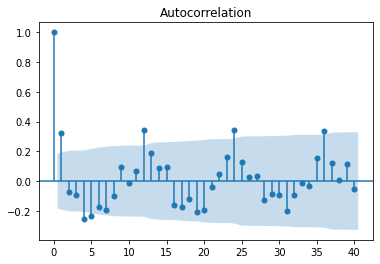

In [17]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data["Combined first difference"].dropna(),lags=40)

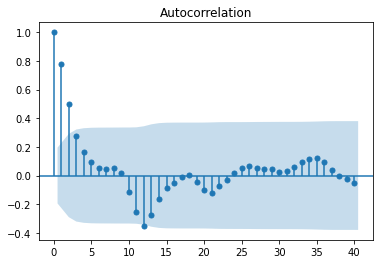

In [18]:
acf12 = plot_acf(data["Combined 12 difference"].dropna(),lags=40)

from acf12_second graph we get the value of q = 3

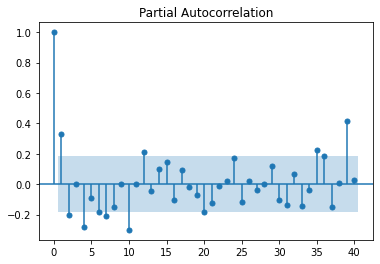

In [19]:
pacf = plot_pacf(data["Combined first difference"].dropna(),lags=40)

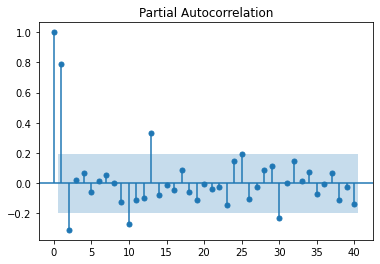

In [20]:
pacf12 = plot_pacf(data["Combined 12 difference"].dropna(),lags=40)

From PACF we get the value of p = 5

## Sarima model fitting

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
model_SARIMA = SARIMAX(data["Combined"],order=(1,1,2),seasonal_order = (1,0,2,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [23]:
model_SARIMA_fit = model_SARIMA.fit()

In [24]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                  113
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -256.244
Date:                            Fri, 26 Aug 2022   AIC                            526.488
Time:                                    14:39:51   BIC                            545.518
Sample:                                01-01-2013   HQIC                           534.209
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6711      0.248      2.703      0.007       0.184       1.158
ma.L1         -0.3981      0.241     -1.653      0.098      -0.870       0.074
ma.L2         -0.3738      0.088     -4.236      0.000      -0.547      -0.201
ar.S.L12       0.9280      0.079     11.769      0.000       0.773       1.083
ma.S.L12      -0.8348      0.121     -6.891      0.000      -1.072      -0.597
ma.S.L24       0.2210      0.170      1.302      0.193      -0.112       0.554
sigma2         5.1247      0.674      7.601      0.000       3.803       6.446
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.99   Prob(JB):                         0.12
Heteroskedasticity (H):               2.16   Skew:                             0.41
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [25]:
from datetime import datetime,timedelta
data['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2022,4,1))
data['pred_Sarima']


Date
2013-01-01      0.000000
2013-02-01    113.200257
2013-03-01    114.060887
2013-04-01    113.216436
2013-05-01    115.121345
                 ...    
2022-01-01    173.936073
2022-02-01    168.297963
2022-03-01    169.636558
2022-04-01    171.849760
2022-05-01           NaN
Name: pred_Sarima, Length: 113, dtype: float64

## Residuals

In [26]:
data['residuals'] = data["Combined"]-data['pred_Sarima']
data['residuals']

Date
2013-01-01    113.200000
2013-02-01      0.699743
2013-03-01     -0.560887
2013-04-01      1.483564
2013-05-01      2.678655
                 ...    
2022-01-01     -1.936073
2022-02-01      2.102037
2022-03-01     -0.036558
2022-04-01      3.250240
2022-05-01           NaN
Name: residuals, Length: 113, dtype: float64

In [27]:
data

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,113.2,NaN,NaN,0.000000,113.200000
2013-02-01,113.9,0.7,NaN,113.200257,0.699743
2013-03-01,113.5,-0.4,NaN,114.060887,-0.560887
2013-04-01,114.7,1.2,NaN,113.216436,1.483564
2013-05-01,117.8,3.1,NaN,115.121345,2.678655
...,...,...,...,...,...
2022-01-01,172.0,-4.7,16.2,173.936073,-1.936073
2022-02-01,170.4,-1.6,12.9,168.297963,2.102037
2022-03-01,169.6,-0.8,13.2,169.636558,-0.036558


<AxesSubplot:ylabel='Density'>

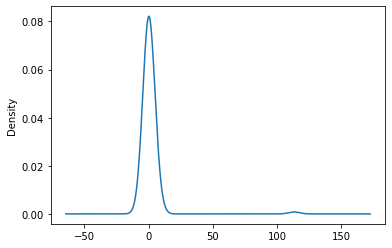

In [28]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [29]:
from scipy import stats
stats.shapiro(data["residuals"])

ShapiroResult(statistic=nan, pvalue=1.0)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.0

so residuals are normally distributed

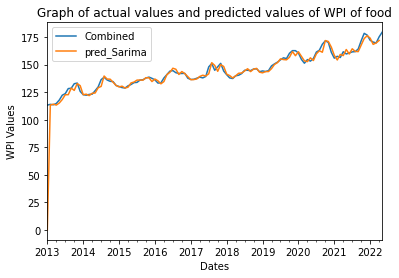

In [30]:
data[['Combined','pred_Sarima']].plot()
plt.title('Graph of actual values and predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

#### Original dataset and our predicted values are nearby same

## Future prediction from May 2022 to May 2023

In [31]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,5,1),end = datetime(2023,5,1))
pred_Sarima2

2022-05-01    175.439509
2022-06-01    180.885260
2022-07-01    182.713811
2022-08-01    182.869840
2022-09-01    183.572050
2022-10-01    186.234433
2022-11-01    186.925366
2022-12-01    183.140836
2023-01-01    180.413135
2023-02-01    179.140689
2023-03-01    177.966590
2023-04-01    181.445274
2023-05-01    181.127703
Freq: MS, Name: predicted_mean, dtype: float64

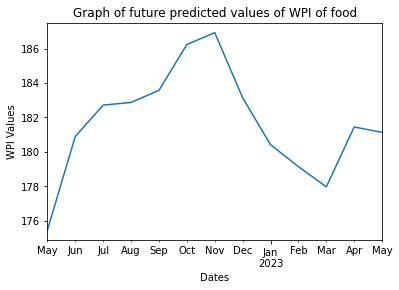

In [32]:
pred_Sarima2.plot()
plt.title('Graph of future predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()